In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
User_det=pd.read_excel("Assignment.xlsx",sheet_name="UserDetails.csv")
User_det.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28.0,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12.0
1,U002,Bob Smith,35.0,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8.0
2,U003,Charlie Lee,42.0,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15.0
3,U004,David Brown,27.0,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10.0
4,U005,Emma White,30.0,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9.0


In [4]:
User_det.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [5]:
User_det.dtypes

User ID                      object
User Name                    object
Age                         float64
Location                     object
Registration Date    datetime64[ns]
Phone                        object
Email                        object
Favorite Meal                object
Total Orders                float64
dtype: object

In [6]:
User_det[['Age', 'Total Orders']] = User_det[['Age', 'Total Orders']].astype('int32')

In [7]:
Cook_session=pd.read_excel("Assignment.xlsx",sheet_name="CookingSessions.csv")
Cook_session.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15.0,4.7


In [8]:
Cook_session.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [9]:
Cook_session.dtypes

Session ID                 object
User ID                    object
Dish Name                  object
Meal Type                  object
Session Start      datetime64[ns]
Session End        datetime64[ns]
Duration (mins)           float64
Session Rating            float64
dtype: object

# Data Cleaning

In [10]:
Cook_session['Duration (mins)'] = Cook_session['Duration (mins)'].astype('int32')

In [11]:
Order_det=pd.read_excel("Assignment.xlsx",sheet_name="OrderDetails.csv")
Order_det.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001.0,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002.0,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003.0,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004.0,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005.0,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [12]:
Order_det.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [13]:
Order_det.dtypes

Order ID               float64
User ID                 object
Order Date      datetime64[ns]
Meal Type               object
Dish Name               object
Order Status            object
Amount (USD)           float64
Time of Day             object
Rating                 float64
Session ID              object
dtype: object

In [14]:
Order_det['Order ID']=Order_det['Order ID'].astype("int32")

In [15]:
Order_det['Rating'].mean()

4.285714285714286

In [16]:
Order_det['Rating'] = Order_det['Rating'].fillna(Order_det['Rating'].mean()).round(1)

In [17]:
Order_det['Rating'] 

0     5.0
1     4.0
2     4.3
3     4.0
4     4.0
5     4.0
6     4.0
7     4.3
8     5.0
9     4.0
10    4.0
11    4.0
12    4.0
13    5.0
14    5.0
15    4.0
Name: Rating, dtype: float64

## Merging 3 Tables

In [18]:
User_cooking=User_det.merge(Cook_session,on='User ID',how='left')

In [19]:
User_cooking

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30.0,4.3
5,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S010,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10.0,4.1
6,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20.0,4.4
8,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S011,Pancakes,Breakfast,2024-12-06 08:00:00,2024-12-06 08:30:00,30.0,4.6
9,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,S005,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15.0,4.7


In [20]:
Order_det.drop(columns=['User ID','Meal Type','Dish Name'], inplace=True)

In [21]:
Order_det

,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,2024-12-01,Completed,15.0,Night,5.0,S001
1,1002,2024-12-01,Completed,10.0,Day,4.0,S002
2,1003,2024-12-02,Canceled,12.5,Night,4.3,S003
3,1004,2024-12-02,Completed,8.0,Morning,4.0,S004
4,1005,2024-12-03,Completed,9.0,Day,4.0,S005
5,1006,2024-12-03,Completed,14.0,Night,4.0,S006
6,1007,2024-12-04,Completed,13.5,Night,4.0,S007
7,1008,2024-12-04,Canceled,11.0,Day,4.3,S008
8,1009,2024-12-05,Completed,12.0,Night,5.0,S009
9,1010,2024-12-05,Completed,7.0,Morning,4.0,S010


In [22]:
final_data = User_cooking.merge(Order_det, on='Session ID', how='left')
final_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5,1001.0,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2,1004.0,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9,1009.0,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0,1002.0,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,2024-12-03 18:30:00,2024-12-03 19:00:00,30.0,4.3,1006.0,2024-12-03,Completed,14.0,Night,4.0


In [23]:
final_data.drop(columns=['Email','Phone'],inplace=True)

In [24]:
final_data.head()

,User ID,User Name,Age,Location,Registration Date,Favorite Meal,Total Orders,Session ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5,1001.0,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S004,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2,1004.0,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S009,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9,1009.0,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,Lunch,8,S002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0,1002.0,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,Lunch,8,S006,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30.0,4.3,1006.0,2024-12-03,Completed,14.0,Night,4.0


In [25]:
final_data.describe()

,Age,Total Orders,Duration (mins),Session Rating,Order ID,Amount (USD),Rating
count,18.000000,18.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,32.500000,10.166667,30.312500,4.518750,1008.500000,11.250000,4.287500
std,5.554542,3.166925,10.873324,0.292617,4.760952,2.435843,0.436463
min,25.000000,5.000000,10.000000,4.000000,1001.000000,7.000000,4.000000
25%,28.000000,8.000000,20.000000,4.300000,1004.750000,9.000000,4.000000
50%,30.500000,9.500000,30.000000,4.550000,1008.500000,11.500000,4.000000
75%,35.000000,12.000000,40.000000,4.725000,1012.250000,13.125000,4.475000
max,42.000000,15.000000,45.000000,5.000000,1016.000000,15.000000,5.000000


In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            18 non-null     object        
 1   User Name          18 non-null     object        
 2   Age                18 non-null     int32         
 3   Location           18 non-null     object        
 4   Registration Date  18 non-null     datetime64[ns]
 5   Favorite Meal      18 non-null     object        
 6   Total Orders       18 non-null     int32         
 7   Session ID         16 non-null     object        
 8   Dish Name          16 non-null     object        
 9   Meal Type          16 non-null     object        
 10  Session Start      16 non-null     datetime64[ns]
 11  Session End        16 non-null     datetime64[ns]
 12  Duration (mins)    16 non-null     float64       
 13  Session Rating     16 non-null     float64       
 14  Order ID    

In [27]:
final_data.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Favorite Meal        0
Total Orders         0
Session ID           2
Dish Name            2
Meal Type            2
Session Start        2
Session End          2
Duration (mins)      2
Session Rating       2
Order ID             2
Order Date           2
Order Status         2
Amount (USD)         2
Time of Day          2
Rating               2
dtype: int64

In [28]:
final_data.dropna(inplace=True)


In [29]:
final_data.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Favorite Meal        0
Total Orders         0
Session ID           0
Dish Name            0
Meal Type            0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
dtype: int64

# EDA

### Time Saving Dishes

In [30]:
#Quick - time saving
avg_time_per_dish=final_data.groupby('Dish Name')['Duration (mins)'].mean().round(1)
avg_time_per_dish_sorted=avg_time_per_dish.sort_values()
avg_time_per_dish_sorted

Dish Name
Oatmeal            10.0
Veggie Burger      20.0
Caesar Salad       21.7
Pancakes           30.0
Spaghetti          35.0
Grilled Chicken    42.5
Name: Duration (mins), dtype: float64

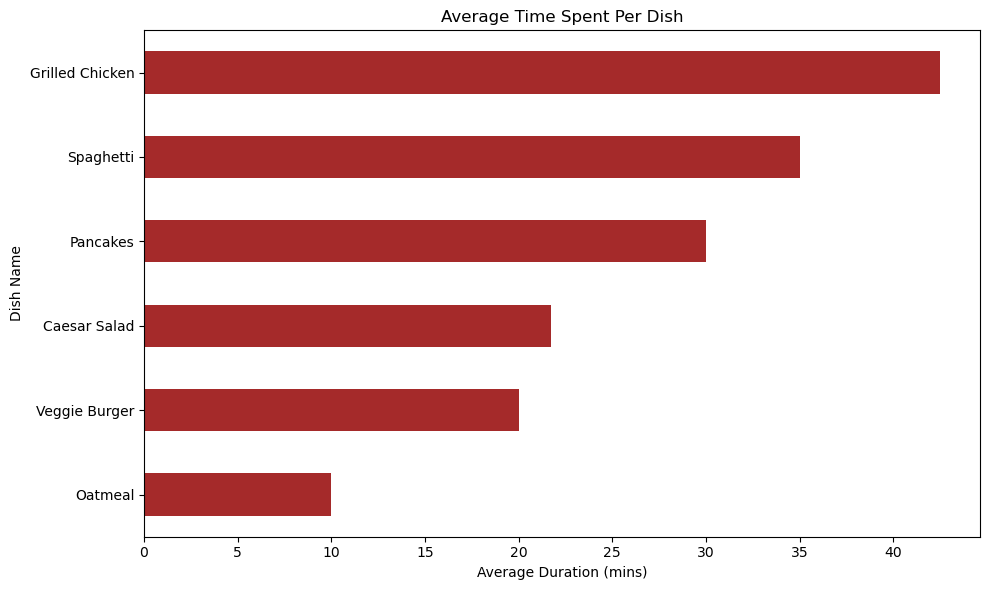

In [31]:
# Plot the average time per dish
plt.figure(figsize=(10, 6))
avg_time_per_dish_sorted.plot(kind='barh', color='Brown')

plt.xlabel('Average Duration (mins)')
plt.ylabel('Dish Name')
plt.title('Average Time Spent Per Dish')
plt.tight_layout() 
plt.show()


For users seeking quick meal options, dishes like Oatmeal, Veggie Burger, and Caesar Salad can be promoted. On the other hand, dishes like Grilled Chicken may appeal to those willing to invest more time in cooking

### Super Easy Dishes

In [32]:
#Top Easy Dishes
avg_session_rating_per_dish=final_data.groupby('Dish Name')['Session Rating'].mean().round(1)
avg_session_rating_per_dish_sorted=avg_session_rating_per_dish.sort_values(ascending=False)
avg_session_rating_per_dish_sorted

Dish Name
Grilled Chicken    4.8
Spaghetti          4.6
Caesar Salad       4.4
Pancakes           4.4
Veggie Burger      4.4
Oatmeal            4.1
Name: Session Rating, dtype: float64

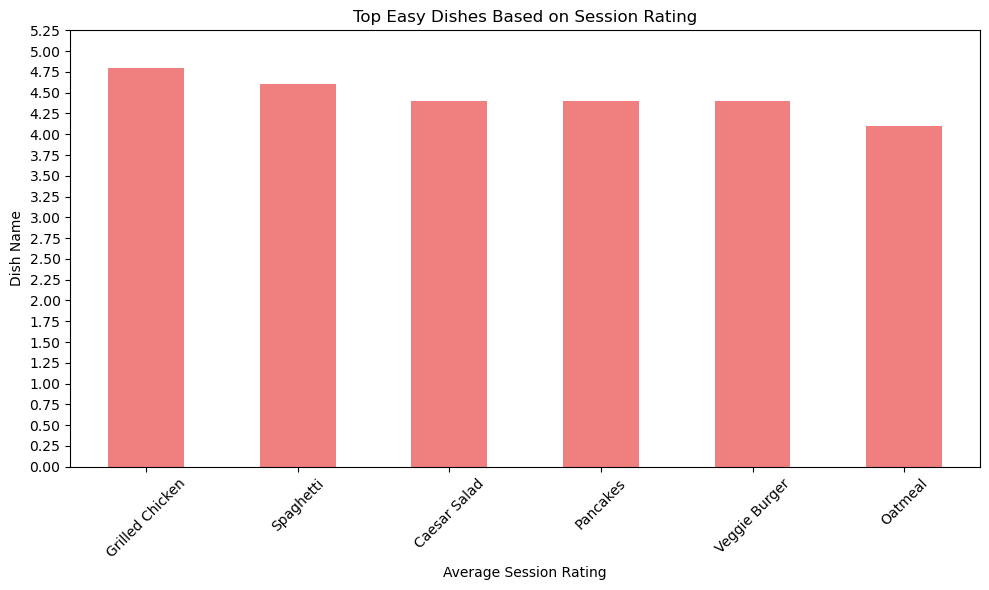

In [33]:
# Plot the average session rating per dish
plt.figure(figsize=(10, 6))
avg_session_rating_per_dish_sorted.plot(kind='bar', color='lightcoral')  

plt.xlabel('Average Session Rating')
plt.ylabel('Dish Name')
plt.title('Top Easy Dishes Based on Session Rating')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 5.5, 0.25))
plt.tight_layout() 
plt.show()

Dishes like Grilled Chicken and Spaghetti strike a balance between user satisfaction and effort, making them ideal to promote for customers seeking enjoyable meals

### Budget Friendly Dishes

In [34]:
#Pocket Friendly
avg_cost_per_dish=final_data.groupby('Dish Name')['Amount (USD)'].min().round(1)
avg_cost_per_dish_sorted=avg_cost_per_dish.sort_values()
avg_cost_per_dish_sorted

Dish Name
Oatmeal             7.0
Pancakes            8.0
Caesar Salad        9.0
Veggie Burger      11.0
Grilled Chicken    12.0
Spaghetti          12.5
Name: Amount (USD), dtype: float64

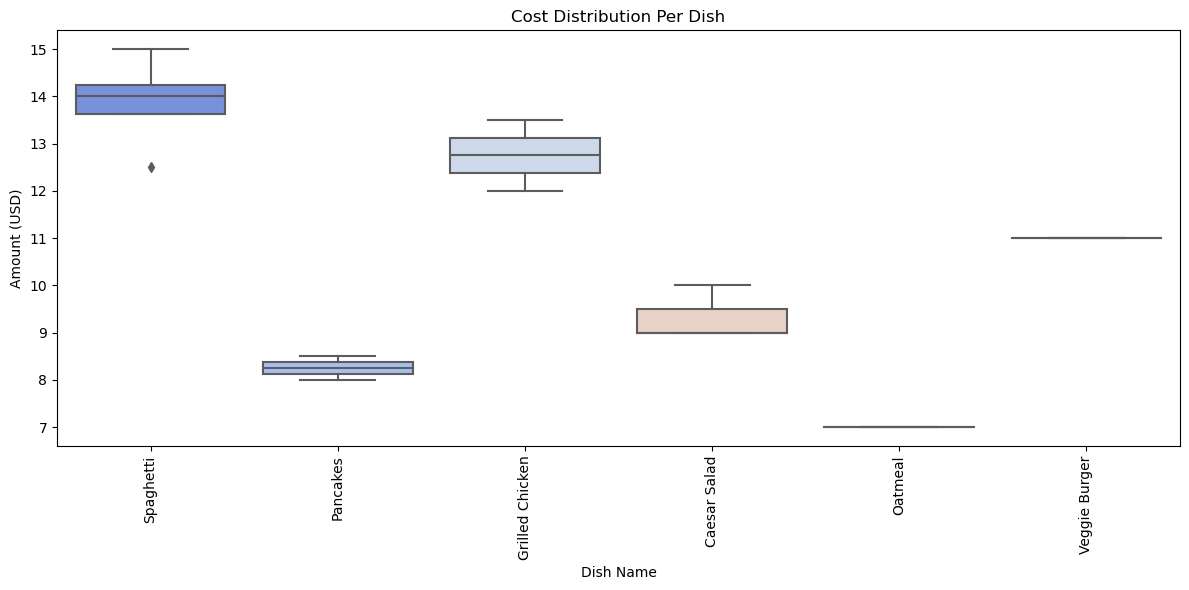

In [35]:
# Box plot for the distribution of 'Amount (USD)' by 'Dish Name'
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='Dish Name', y='Amount (USD)', palette='coolwarm')

# Add labels and title
plt.xlabel('Dish Name')
plt.ylabel('Amount (USD)')
plt.title('Cost Distribution Per Dish')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

For users looking for budget-friendly options, dishes like Oatmeal, Pancakes, and Caesar Salad can be emphasized. Meanwhile, premium dishes like Grilled Chicken and Spaghetti can be marketed as value-for-money options for customers willing to spend a little extra.

### Top Rated Tasty Dishes

In [36]:
avg_rating_per_dish=final_data.groupby('Dish Name')['Rating'].mean().round(1)
avg_rating_per_dish_sorted=avg_rating_per_dish.sort_values(ascending=False)
avg_rating_per_dish_sorted

Dish Name
Grilled Chicken    4.6
Spaghetti          4.5
Veggie Burger      4.2
Caesar Salad       4.0
Oatmeal            4.0
Pancakes           4.0
Name: Rating, dtype: float64

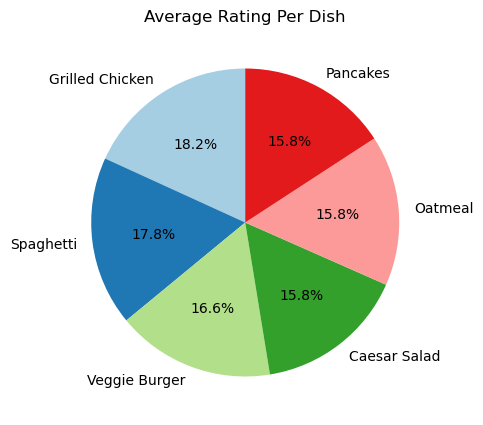

In [37]:
# Plot the pie chart for average ratings per dish
plt.figure(figsize=(5, 5))
avg_rating_per_dish_sorted.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Average Rating Per Dish')
plt.ylabel('')
plt.show()


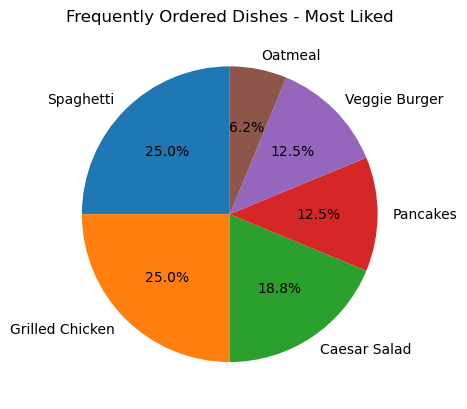

In [38]:
import matplotlib.pyplot as plt

# Calculate the counts of each unique dish name
dish_counts = final_data['Dish Name'].value_counts()

# Plot the pie chart
plt.pie(dish_counts, labels=dish_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequently Ordered Dishes - Most Liked')
plt.show()


Grilled Chicken and Spaghetti are not only highly rated but also frequently ordered, suggesting they should be featured prominently in promotions and menus.

### Most Busy Time Of The Day

In [39]:
#Most Busy time
most_fav_meal_type=final_data.groupby('Meal Type')['Order ID'].count()
most_fav_meal_type.sort_values(ascending=False)

Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: Order ID, dtype: int64

In [40]:
busy_time=final_data.groupby('Time of Day')['Order ID'].count()
busy_time.sort_values(ascending=False)

Time of Day
Night      8
Day        5
Morning    3
Name: Order ID, dtype: int64

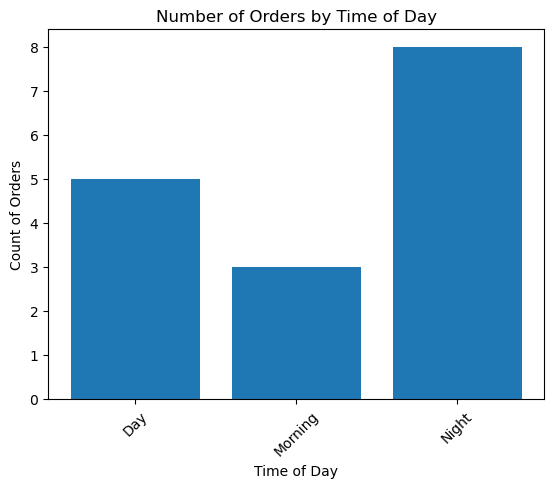

In [41]:
import matplotlib.pyplot as plt

# Count the number of orders for each time of day
order_counts = final_data.groupby('Time of Day')['Order ID'].count()

# Plot the bar chart
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('Time of Day')
plt.ylabel('Count of Orders')
plt.title('Number of Orders by Time of Day')
plt.xticks(rotation=45)
plt.show()


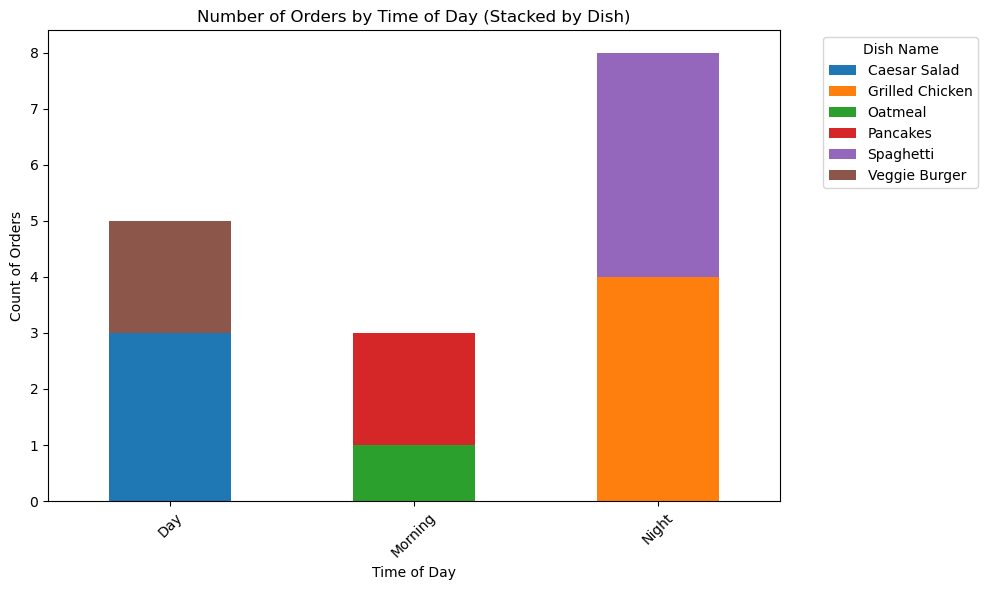

In [42]:
import matplotlib.pyplot as plt

#Count orders for each combination of 'Time of Day' and 'Dish Name'
order_counts = final_data.groupby(['Time of Day', 'Dish Name'])['Order ID'].count().unstack(fill_value=0)

# Plot the stacked bar chart
order_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel('Time of Day')
plt.ylabel('Count of Orders')
plt.title('Number of Orders by Time of Day (Stacked by Dish)')
plt.xticks(rotation=45) 
plt.legend(title='Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


Night is the busiest time, with dinner orders peaking, particularly for popular dishes like Grilled Chicken and Spaghetti.

## Dish Ordered Per Day

In [43]:
final_data['Day'] = final_data['Session Start'].dt.day_name()
final_data['Day']

0        Sunday
1        Monday
2      Thursday
3        Sunday
4       Tuesday
5      Thursday
6        Monday
7     Wednesday
8        Friday
9       Tuesday
10       Friday
11    Wednesday
12     Saturday
13     Saturday
14       Sunday
15       Sunday
Name: Day, dtype: object

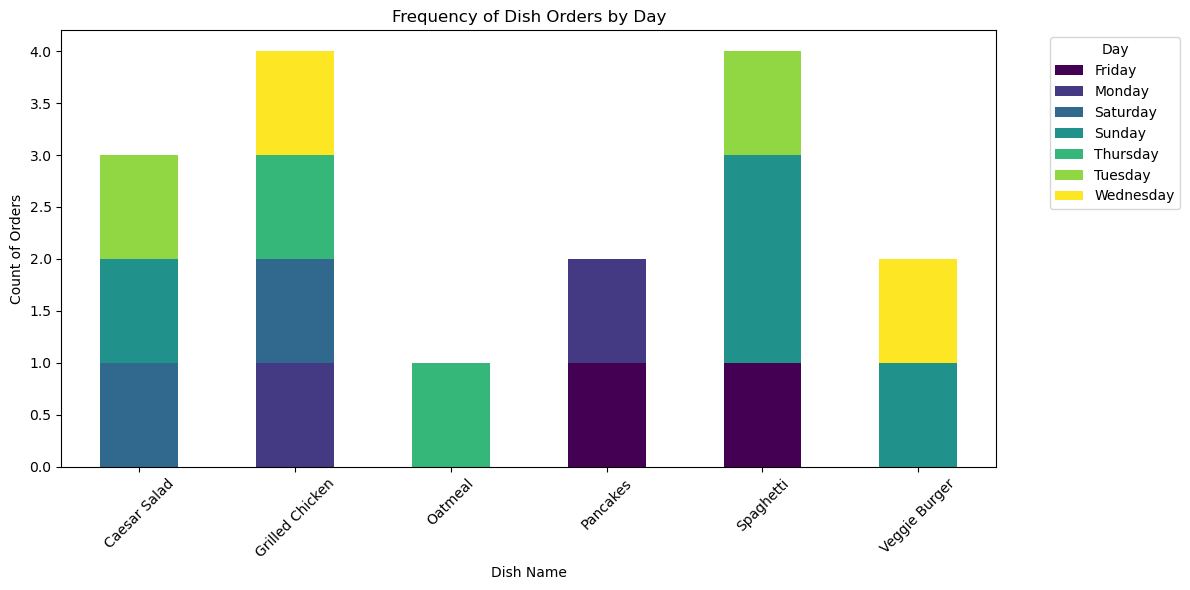

In [44]:
import matplotlib.pyplot as plt

#Count orders for each combination of 'Day' and 'Dish Name'
order_counts = final_data.groupby(['Dish Name','Day'])['Order ID'].count().unstack(fill_value=0)

# Plot the stacked bar chart
order_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel('Dish Name')
plt.ylabel('Count of Orders')
plt.title('Frequency of Dish Orders by Day')
plt.xticks(rotation=45) 
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()


Sunday seems to be a busy day.

### Demographic Factors affecting the orders

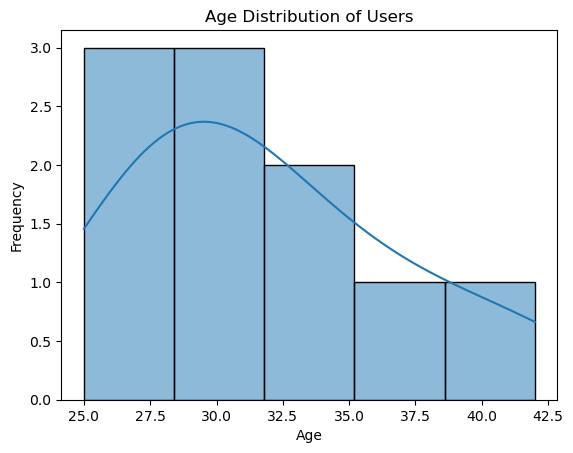

In [45]:
# Distribution of Age
sns.histplot(User_det['Age'], kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution shows that the majority of users fall within the age range of 25 to 35 years. Hence tailored reccomendations and targeted marketing can be done.

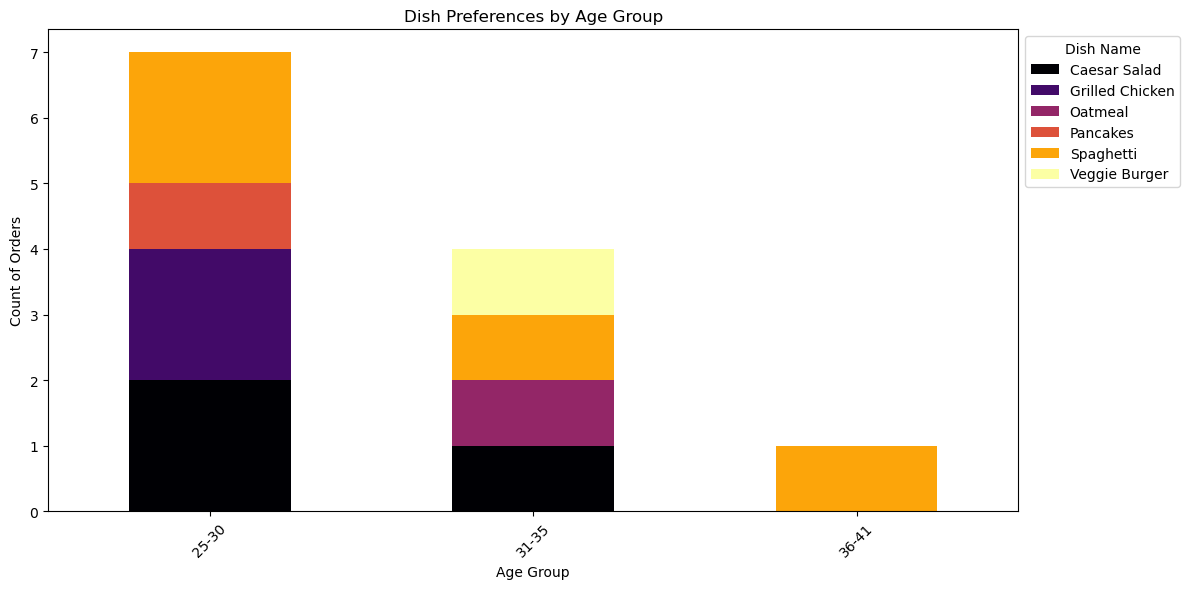

In [49]:
#Orders prefered by a certain age group
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


age_bins = [25, 30, 35, 41]
age_labels = ['25-30', '31-35', '36-41']
final_data['Age Group'] = pd.cut(final_data['Age'], bins=age_bins, labels=age_labels, right=True)


age_dish_counts = final_data.groupby(['Age Group', 'Dish Name'])['Order ID'].count().unstack(fill_value=0)


age_dish_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='inferno')


plt.title('Dish Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)  
plt.legend(title='Dish Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


For the 25-30 age group, dishes like Caesar Salad, Grilled Chicken, and Spaghetti could be emphasized, as they are favored by this group.
Spaghetti appears as a preference for the 36-41 age group.